In [11]:
#-----01 within user----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold
import time


In [22]:
# --------starts here-------
skip_list = [3,8]
#label
y=[]
# for k in range(10):#num of participants

for i in range(14):
    if i in skip_list:
        continue
    for j in range(30):
        y.append(i)
# print(y)
y_test = []
y_train = []
for i in range(14):
    if i in skip_list:
        continue
    for j in range(20):
        y_train.append(i)
    for j in range(10):
        y_test.append(i)


print(len(y))
skip_len = len(y)

tsfresh_feature = pd.read_csv("../data/final_filtered2400.csv")
tsfresh_feature = tsfresh_feature.drop(["id"],axis=1)

selected_list = []
for i in range(10):
    for j in range(14):
        if(j in skip_list):continue
        for k in range(30):
            selected_list.append(i*420+j*30+k)
# print(selected_list)

# print(tsfresh_feature.iloc[selected_list])
tsfresh_feature = tsfresh_feature.iloc[selected_list]
print(tsfresh_feature.shape)

360
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 270, 271, 272, 273, 274, 275, 276, 277, 278, 

In [3]:
# print((y_train),(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 

In [13]:
#------ adding features from Shutong ------#
# fftfeatures1 = np.loadtxt(fname = "data/22gesture.txt",delimiter=',')
# fftfeatures = np.loadtxt(fname = "data/qstSpectro.txt",delimiter=',')
# fftfeatures = np.concatenate((fftfeatures1,fftfeatures2),axis=0)
fftfeatures = np.loadtxt(fname = "../data/fftFeature2400.txt",delimiter=',')
print(fftfeatures.shape)
_len = len(fftfeatures[:][0])
fft_df = pd.DataFrame(data=fftfeatures[:],    # values
              index=[i for i in range(4200)],    # 1st column as index
              columns=["f"+str(i) for i in range(_len)])

fft_df = fft_df.iloc[selected_list]
print(fft_df.shape)
features_combine = fft_df.join(tsfresh_feature)
features_combine.shape

(4200, 100)
(3600, 100)


(3600, 563)

In [14]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
feature_list = []
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*skip_len:(people+1)*skip_len]
    
    x_train=X[0:20]
#     print(x_train)
    x_test=X[20:30]
    for gest in range(1,14-len(skip_list)):
        x_train = pd.concat([x_train,X[gest*30+0:gest*30+20]])
        x_test =  pd.concat([x_test,X[gest*30+20:gest*30+30]])
#     for i in range(10,20):
    for j in range(0,100):
#             x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.5, test_size=0.5)
        clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        train_results[people].append(temp)
        if (temp > maxyhat_train[people]).any():
            maxyhat_train[people] = temp
        temp = clf.score(x_test, y_test)
        test_results[people].append(temp)
        feature_importances = pd.DataFrame(clf.feature_importances_,
                               index = x_train.columns,
                                columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
        if (maxyhat_test[people] < temp).any():
            maxyhat_test[people] = temp
            for feature in feature_importances.index.tolist()[:50]:
                if not feature in feature_list:
                    feature_list.append(feature)
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
    print(maxyhat_test)
print(maxyhat_train)
print(maxyhat_test)

29.877274990081787
[0.8583333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0]
31.879146337509155
[0.8583333333333333, 0.875, 0, 0, 0, 0, 0, 0, 0, 0]
30.858869314193726
[0.8583333333333333, 0.875, 0.8916666666666667, 0, 0, 0, 0, 0, 0, 0]
33.045427560806274
[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0, 0, 0, 0, 0, 0]
30.940342903137207
[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0.8583333333333333, 0, 0, 0, 0, 0]
30.307199001312256
[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0.8583333333333333, 0.8666666666666667, 0, 0, 0, 0]
33.594475746154785
[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0.8583333333333333, 0.8666666666666667, 0.9666666666666667, 0, 0, 0]
31.200767040252686
[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0.8583333333333333, 0.8666666666666667, 0.9666666666666667, 0.7916666666666666, 0, 0]
30.572508573532104
[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0.8583333333333333, 0.8666666666666667, 0.9666666666666667, 0.79166666

In [15]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
np.mean(mylist)


[0.8583333333333333, 0.875, 0.8916666666666667, 0.975, 0.8583333333333333, 0.8666666666666667, 0.9666666666666667, 0.7916666666666666, 0.49166666666666664, 0.9083333333333333]


0.8483333333333334

In [23]:
test_results

[[0.8166666666666667,
  0.75,
  0.7916666666666666,
  0.8083333333333333,
  0.8166666666666667,
  0.8166666666666667,
  0.825,
  0.8,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8416666666666667,
  0.8083333333333333,
  0.8,
  0.825,
  0.825,
  0.8083333333333333,
  0.825,
  0.8083333333333333,
  0.825,
  0.8,
  0.7833333333333333,
  0.8333333333333334,
  0.775,
  0.7916666666666666,
  0.825,
  0.8083333333333333,
  0.8166666666666667,
  0.8166666666666667,
  0.8083333333333333,
  0.8083333333333333,
  0.8,
  0.8416666666666667,
  0.8,
  0.8083333333333333,
  0.8083333333333333,
  0.8,
  0.8166666666666667,
  0.8,
  0.7916666666666666,
  0.8083333333333333,
  0.825,
  0.8,
  0.8,
  0.8083333333333333,
  0.8083333333333333,
  0.8416666666666667,
  0.8583333333333333,
  0.825,
  0.7916666666666666,
  0.8416666666666667,
  0.825,
  0.8333333333333334,
  0.8333333333333334,
  0.7916666666666666,
  0.825,
  0.825,
  0.7916666666666666,
  0.825,
  0.8,
  0.833333333

In [ ]:
print(len(feature_list))
(feature_list)
# import pickle


# with open('feature_list.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(feature_list, filehandle)

In [ ]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*420:(people+1)*420]
    for i in range(10,20):
        for j in range(10,20):
            x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.5, test_size=0.5)
            
            clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
            clf.fit(x_train, y_train)
            temp = clf.score(x_train, y_train)
            train_results[people].append(temp)
            if (temp > maxyhat_train[people]).any():
                maxyhat_train[people] = temp
            temp = clf.score(x_test, y_test)
            test_results[people].append(temp)
            feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
            if (maxyhat_test[people] < temp).any():
                maxyhat_test[people] = temp
              
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)

In [ ]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
np.mean(mylist)


In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.arange(100), train_results,'b', label='Train AUC')
line2, = plt.plot(np.arange(100), test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [19]:
y_max=[]
for i in range(10):
    y_max.append(np.argmax(test_results[i]))
    print(np.argmax(test_results[i]))

47
13
54
43
7
9
46
6
8
22


In [20]:
y_max

[47, 13, 54, 43, 7, 9, 46, 6, 8, 22]

0.8583333333333333
Normalized confusion matrix


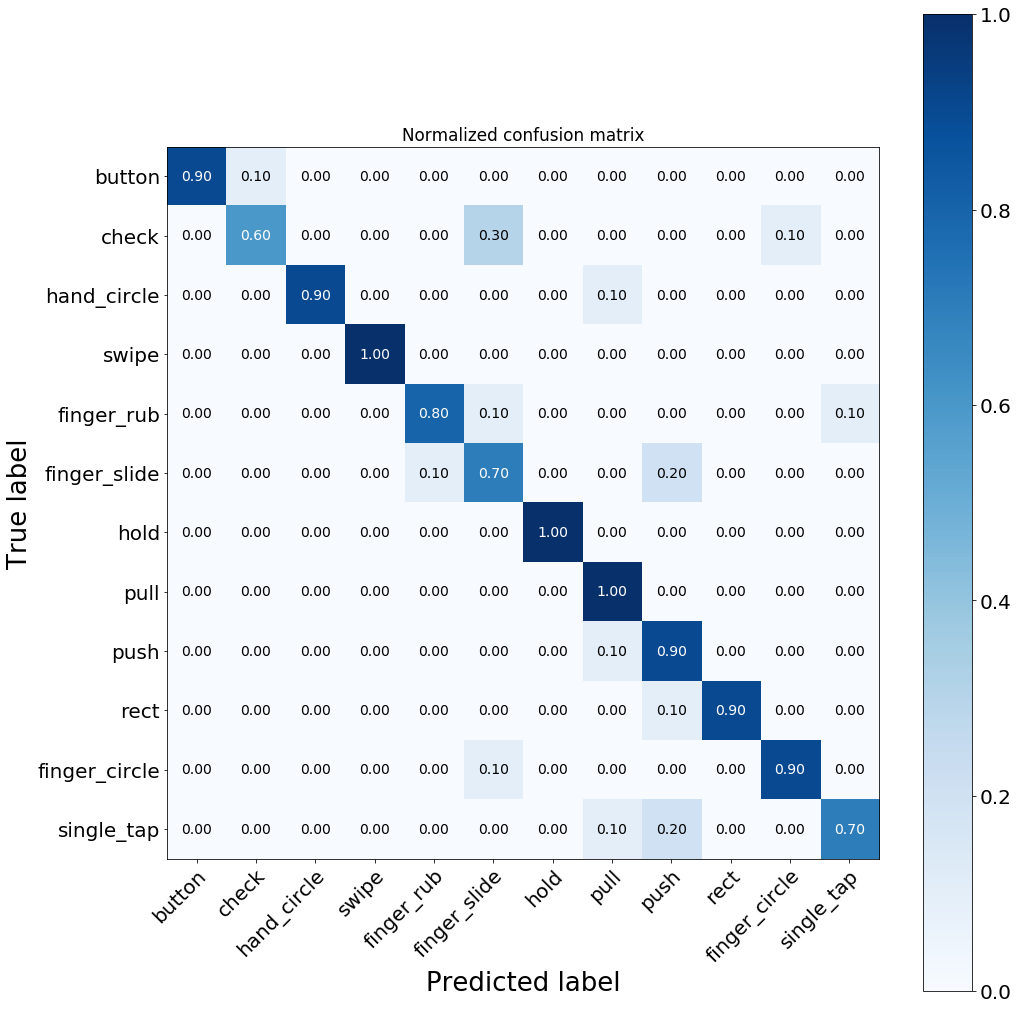

0.875
Normalized confusion matrix


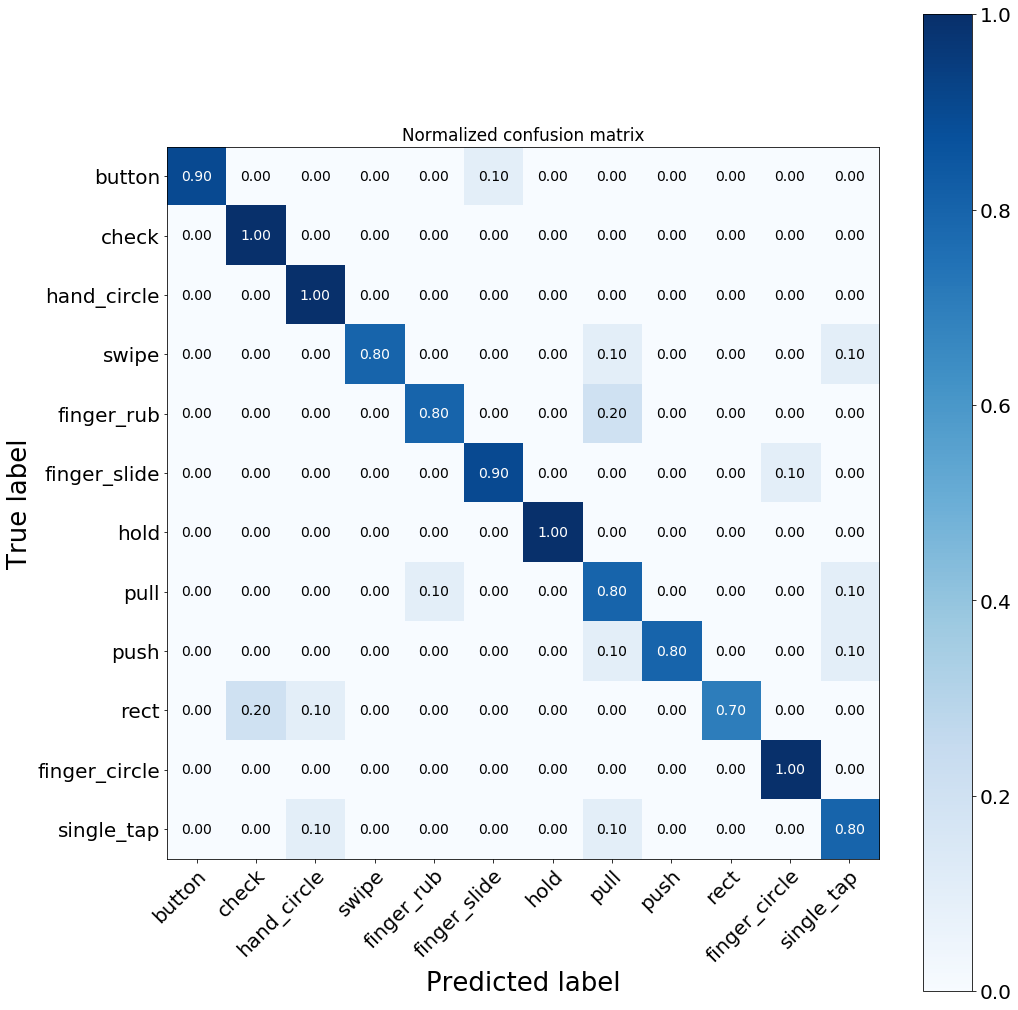

0.8916666666666667
Normalized confusion matrix


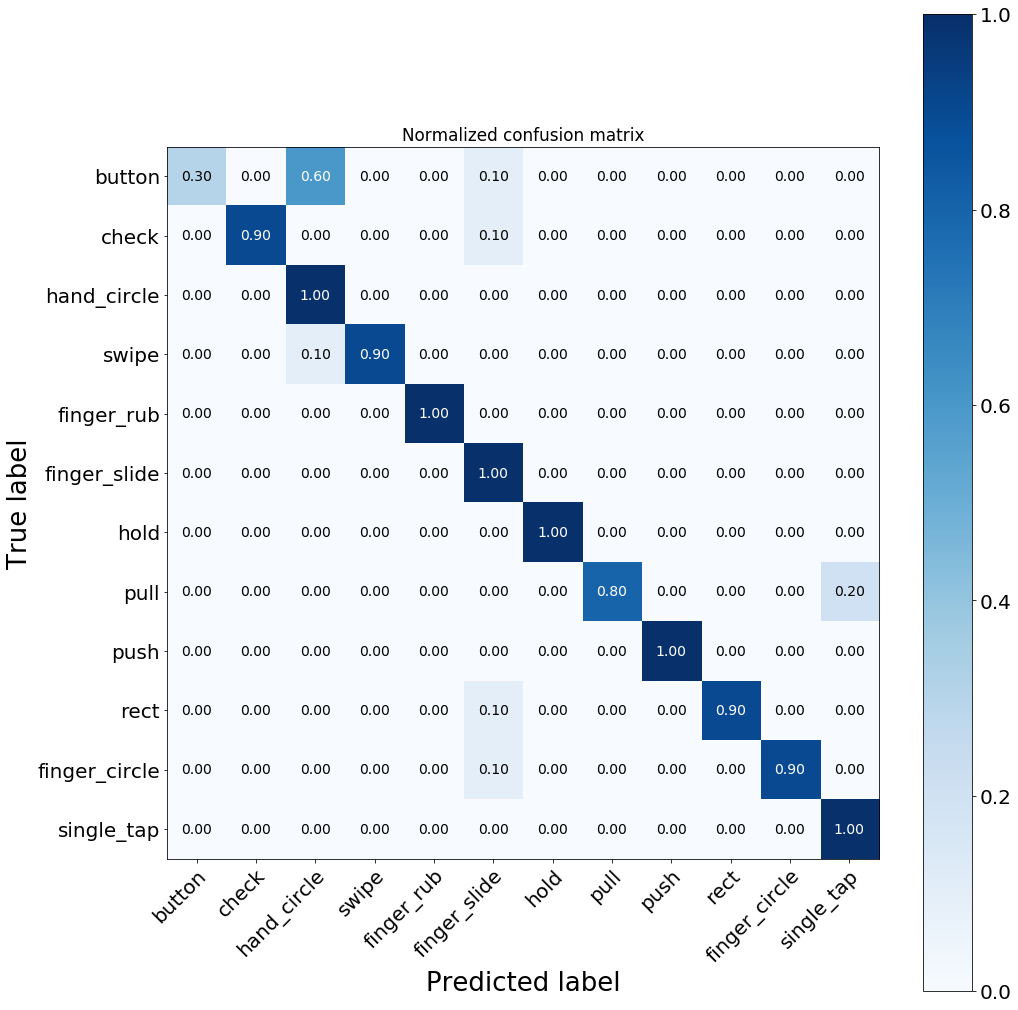

0.975
Normalized confusion matrix


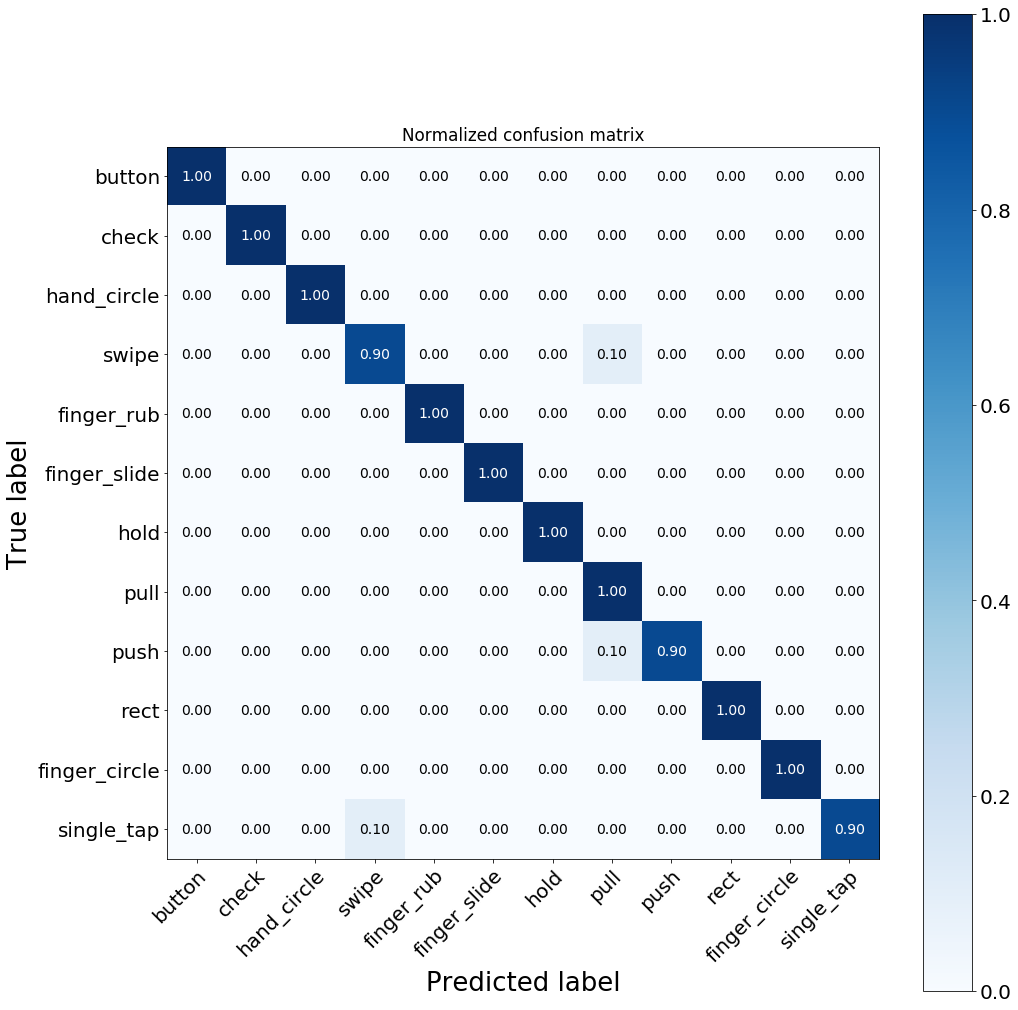

0.8583333333333333
Normalized confusion matrix


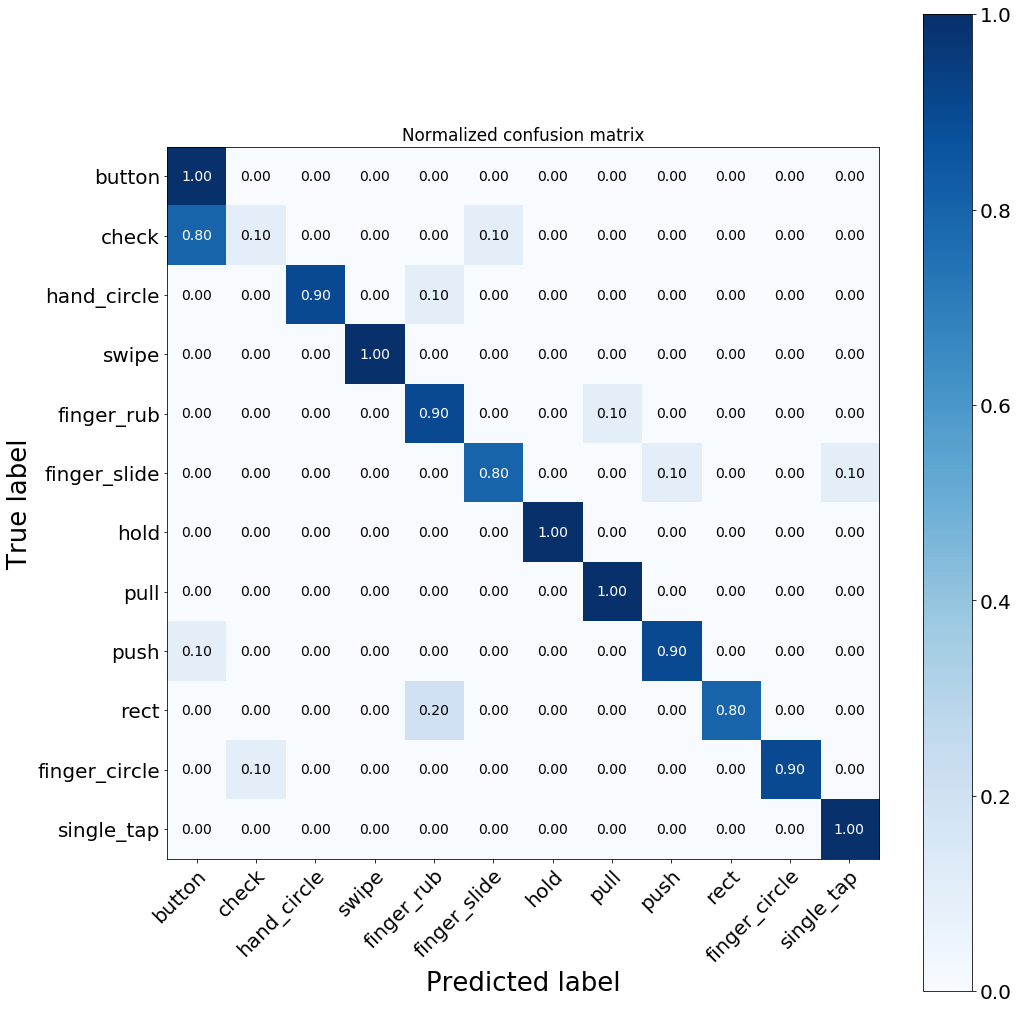

0.8666666666666667
Normalized confusion matrix


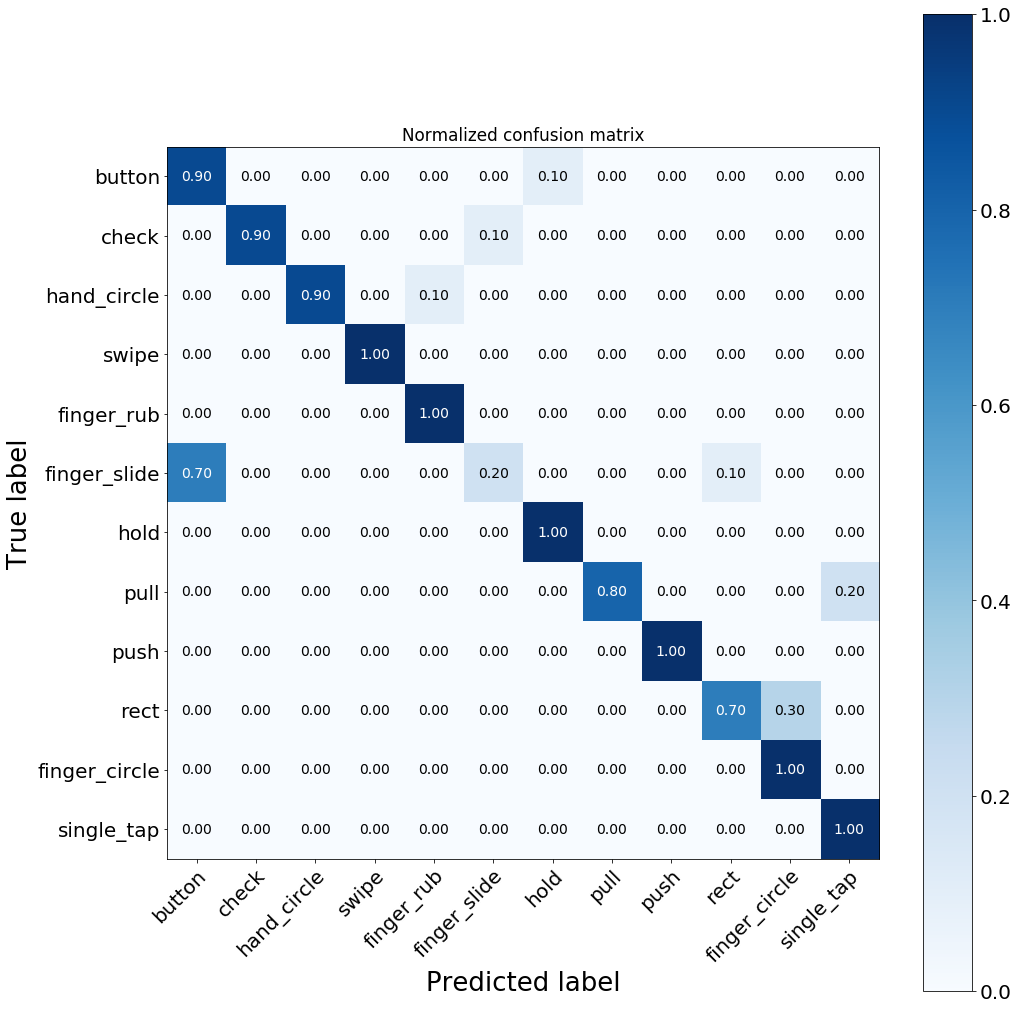

0.9666666666666667
Normalized confusion matrix


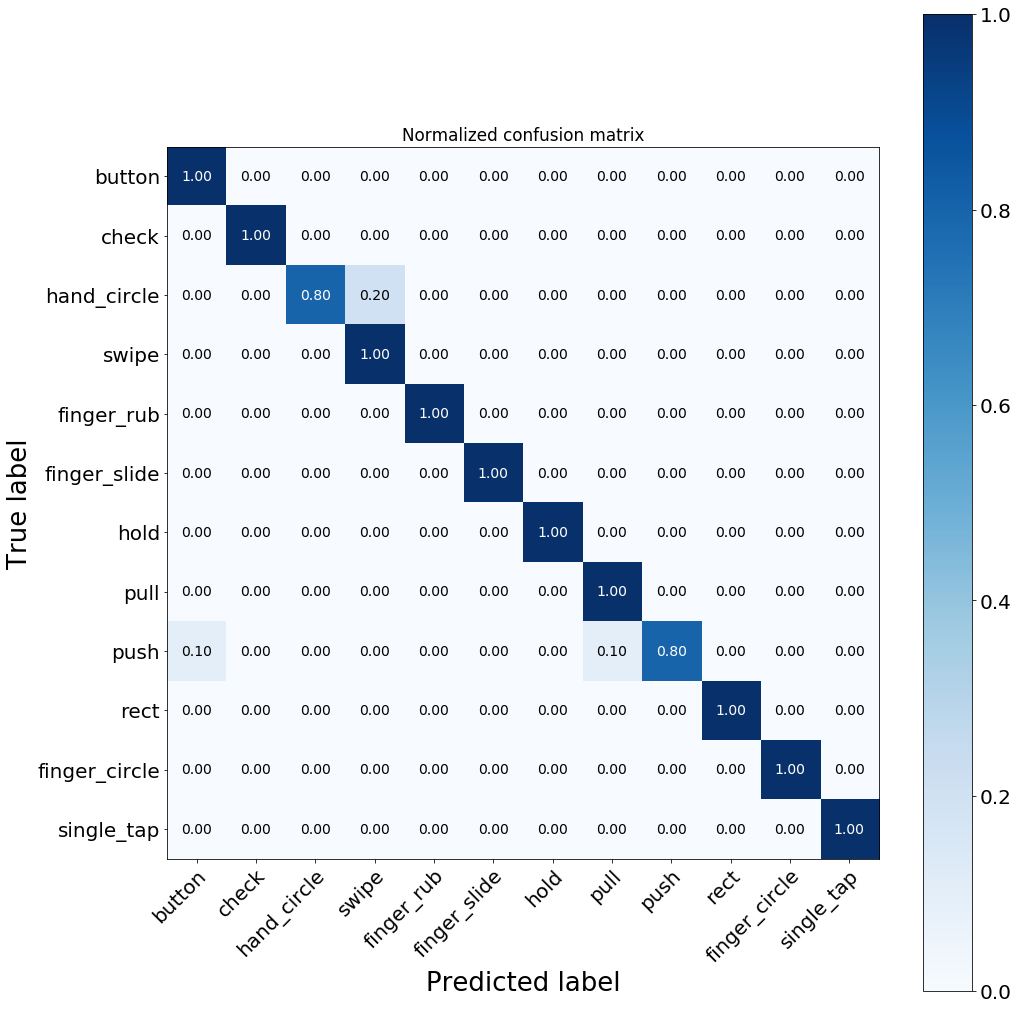

0.7916666666666666
Normalized confusion matrix


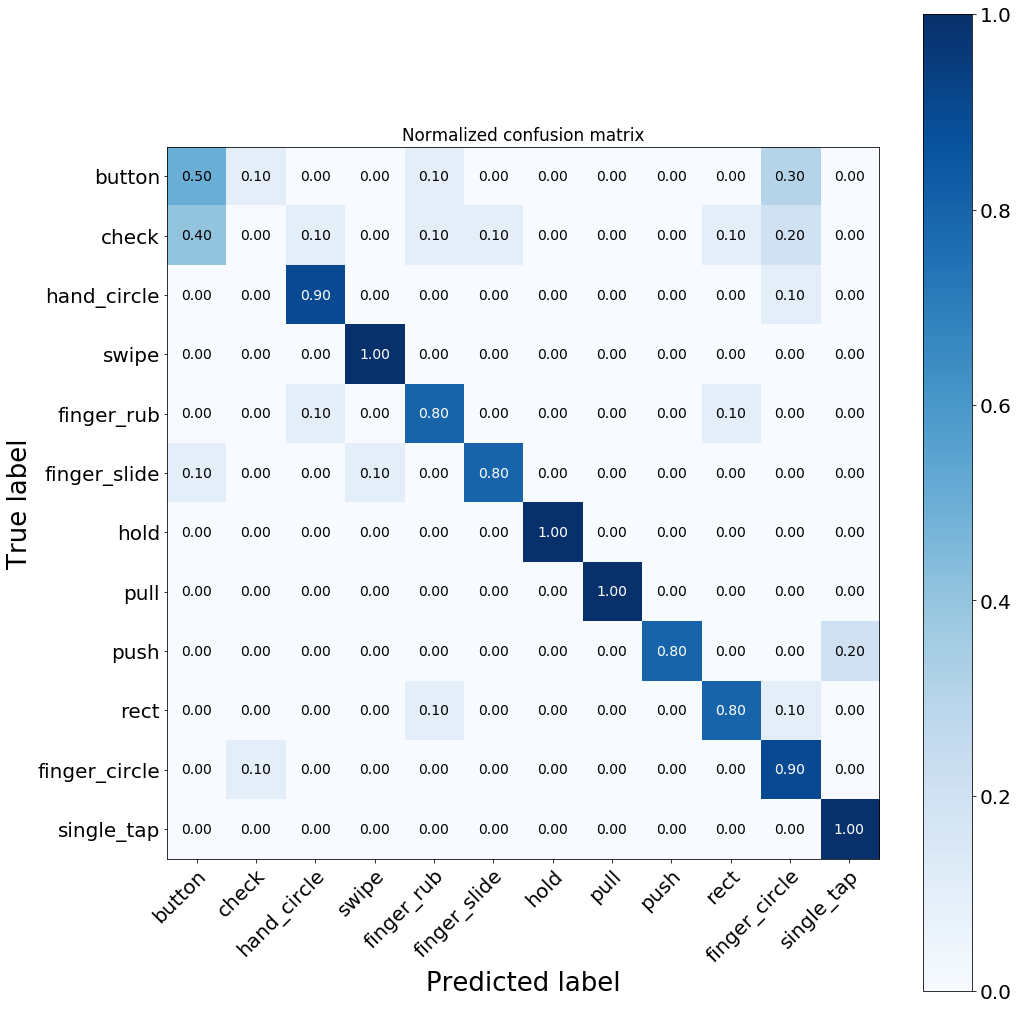

0.49166666666666664
Normalized confusion matrix


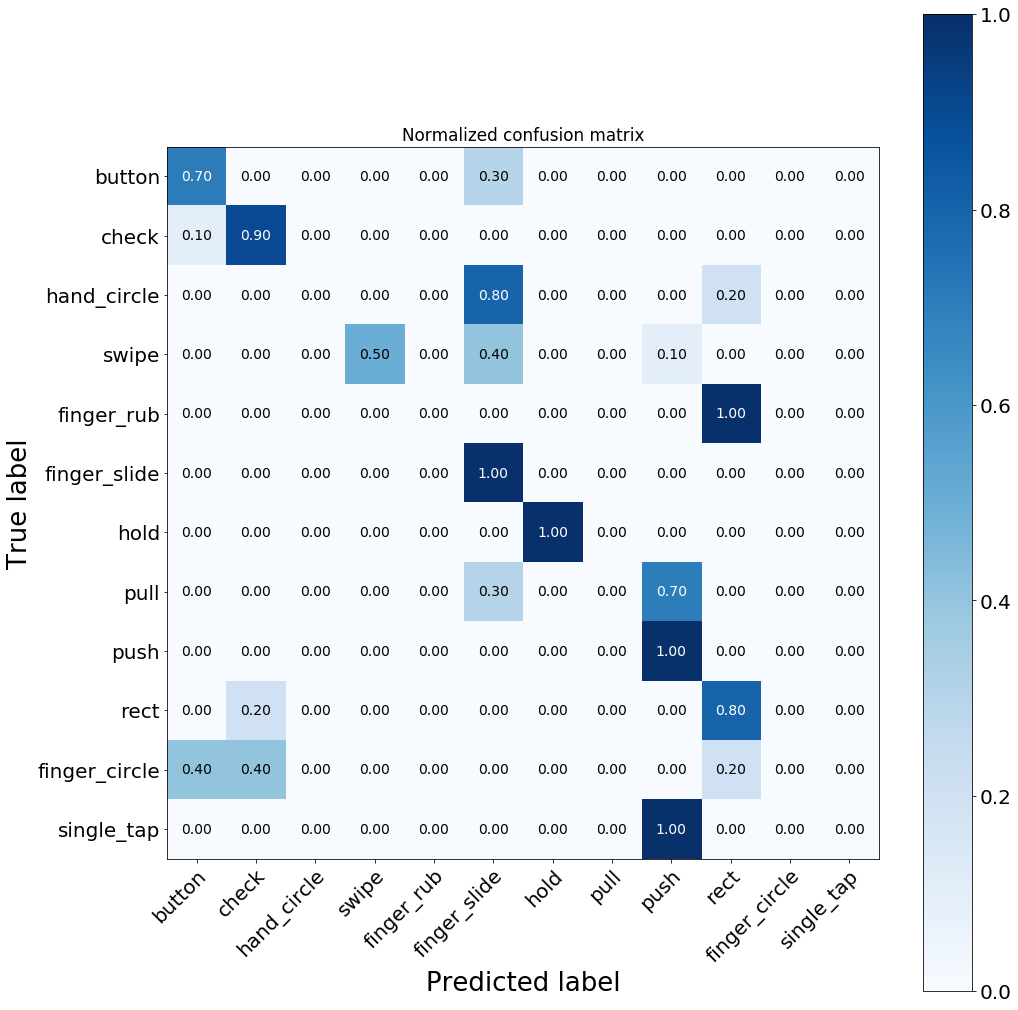

0.9083333333333333
Normalized confusion matrix


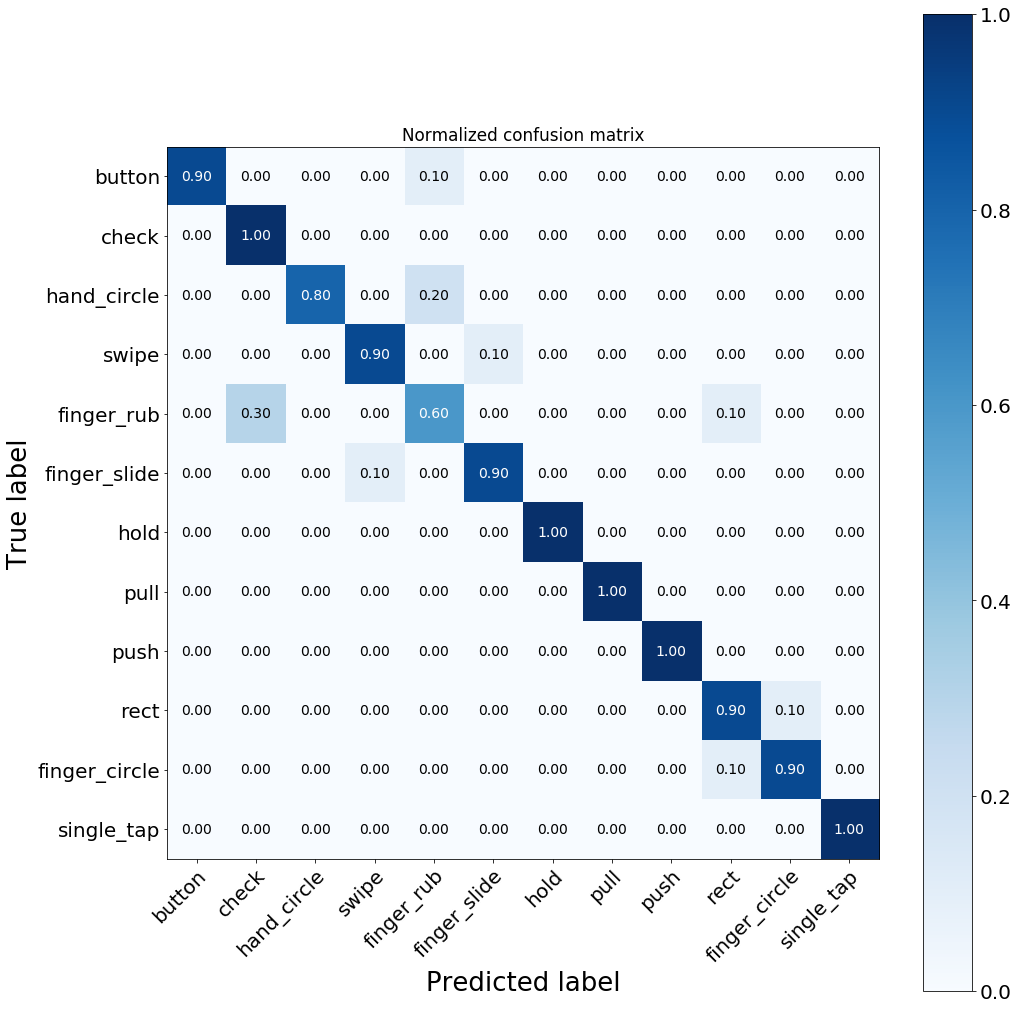

Normalized confusion matrix


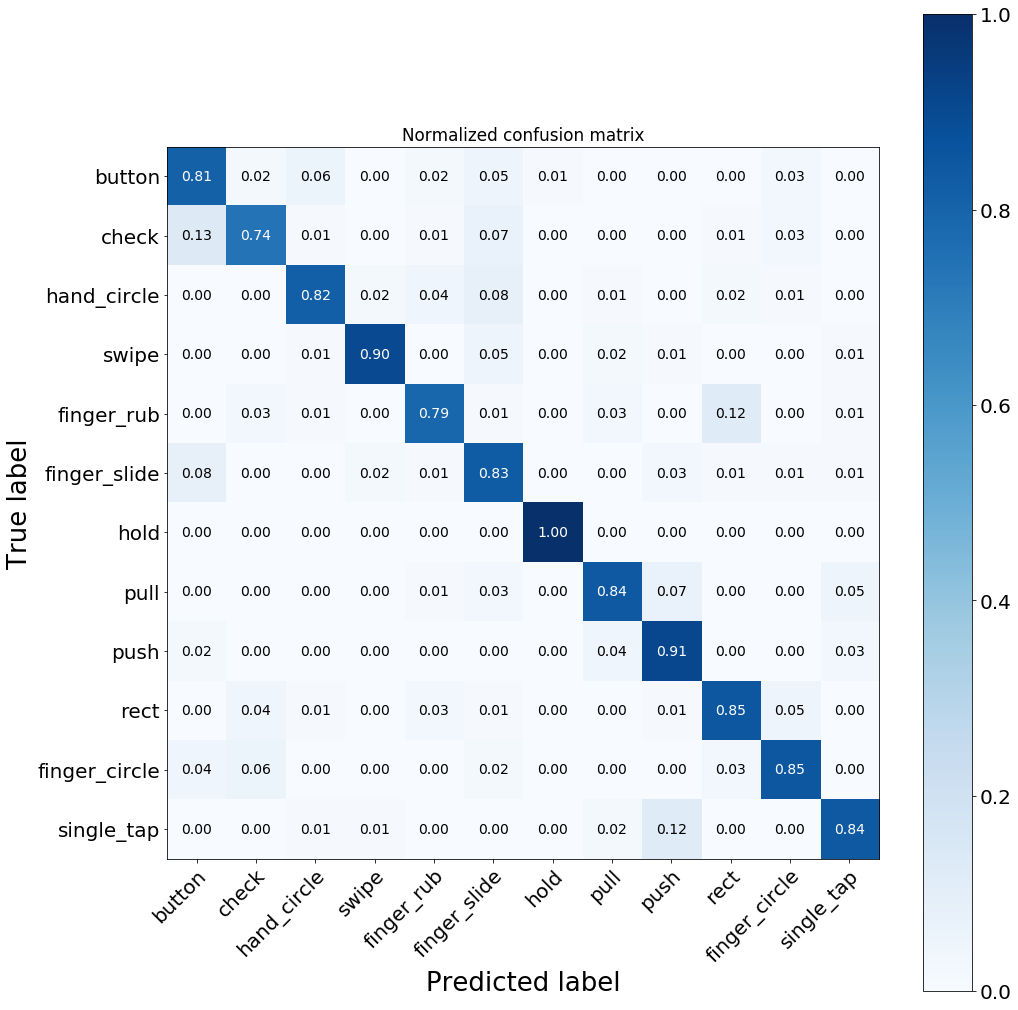

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0


In [21]:
#------ using ranked features ----------#
bestmodel = 0
maxyhat_test=0

fig = None
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    global fig
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    plt.rcParams.update({'font.size': 14})
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=26)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

v2_names=['button','check','hand_circle','double_tap','swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','finger_circle',
         'single_tap']

v2_names = np.array(v2_names)
y_pred = []
y_test_ = []

for people in range(10):
    
    #get each user
    X = features_combine[people*skip_len:(people+1)*skip_len]
    x_train=X[0:20]
#     print(x_train)
    x_test=X[20:30]
    for gest in range(1,14-len(skip_list)):
        x_train = pd.concat([x_train,X[gest*30+0:gest*30+20]])
        x_test =  pd.concat([x_test,X[gest*30+20:gest*30+30]])
        
    j=y_max[people]

    clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
    clf.fit(x_train, y_train)
    print(clf.score(x_test,y_test))
    y_pred = y_pred+list(clf.predict(x_test))
    plot_confusion_matrix(y_test, list(clf.predict(x_test)), classes=v2_names, normalize=True,title='')
    plt.show()
    fig.savefig("2400_session"+str(people)+'_'+str(clf.score(x_test,y_test))+".pdf", bbox_inches = "tight")
#     print(list(clf.predict(x_test)))
#     print(y_test)
    y_test_ += y_test
plot_confusion_matrix(y_test_, y_pred, classes=v2_names, normalize=True,
          title='')
plt.show()

seconds = time.time()-seconds
#     print(seconds)
seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)
fig.savefig("4200_session.png", bbox_inches = "tight")

In [23]:
from joblib import dump, load
dump(clf, '4200.joblib')

['4200.joblib']

In [ ]:
clf2 = load('filename.joblib')